In this scenario, we have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

# Import Libraries

In [1]:
from bs4 import BeautifulSoup
import urllib.request
import unicodedata
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [2]:
#nltk.download('stopwords')

# Import Text Data

In [3]:
response = urllib.request.urlopen('http://php.net/')
response

In [4]:
html = response.read()
html

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="icon" type="image/svg+xml" sizes="any" href="https://www.php.net/favicon.svg?v=2">\n <link rel="icon" type="image/png" sizes="196x196" href="https://www.php.net/favicon-196x196.png?v=2">\n <link rel="icon" type="image/png" sizes="32x32" href="https://www.php.net/favicon-32x32.png?v=2">\n <link rel="icon" type="image/png" sizes="16x16" href="https://www.php.net/favicon-16x16.png?v=2">\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico?v=2">\n\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type=

In [5]:
soup = BeautifulSoup(html, "html5lib")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   PHP: Hypertext Preprocessor
  </title>
  <link href="https://www.php.net/favicon.svg?v=2" rel="icon" sizes="any" type="image/svg+xml"/>
  <link href="https://www.php.net/favicon-196x196.png?v=2" rel="icon" sizes="196x196" type="image/png"/>
  <link href="https://www.php.net/favicon-32x32.png?v=2" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://www.php.net/favicon-16x16.png?v=2" rel="icon" sizes="16x16" type="image/png"/>
  <link href="https://www.php.net/favicon.ico?v=2" rel="shortcut icon"/>
  <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
  <link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
  <link href="https://www.p

In [6]:
html_body = soup.body
html_body

<body class="home">

<nav class="navbar navbar-fixed-top" id="head-nav">
  <div class="navbar-inner clearfix">
    <a class="brand" href="/"><img alt="php" height="24" src="/images/logos/php-logo.svg" width="48"/></a>
    <div id="mainmenu-toggle-overlay"></div>
    <input id="mainmenu-toggle" type="checkbox"/>
    <ul class="nav">
      <li class=""><a href="/downloads">Downloads</a></li>
      <li class=""><a href="/docs.php">Documentation</a></li>
      <li class=""><a href="/get-involved">Get Involved</a></li>
      <li class=""><a href="/support">Help</a></li>
      <li class="">
        <a href="/releases/8.3/index.php">
          <img alt="php8.3" height="22" src="/images/php8/logo_php8_3.svg" width="60"/>
        </a>
      </li>
    </ul>
    <form action="/search.php" class="navbar-search" id="topsearch">
      <input name="show" type="hidden" value="quickref"/>
      <input accesskey="s" class="search-query" name="pattern" placeholder="Search" type="search"/>
    </form>
  <

# Text Cleansing

In [7]:
# display only text (remove unnecessary whitespace around text)
lst_text = []
for string in html_body.strings:
    text = string.strip()
    lst_text.append(text)
    print(text)








Downloads

Documentation

Get Involved

Help















Getting Started

Introduction

A simple tutorial

Language Reference

Basic syntax

Types

Variables

Constants

Expressions

Operators

Control Structures

Functions

Classes and Objects

Namespaces

Enumerations

Errors

Exceptions

Fibers

Generators

Attributes

References Explained

Predefined Variables

Predefined Exceptions

Predefined Interfaces and Classes

Predefined Attributes

Context options and parameters

Supported Protocols and Wrappers



Security

Introduction

General considerations

Installed as CGI binary

Installed as an Apache module

Session Security

Filesystem Security

Database Security

Error Reporting

User Submitted Data

Hiding PHP

Keeping Current

Features

HTTP authentication with PHP

Cookies

Sessions

Dealing with XForms

Handling file uploads

Using remote files

Connection handling

Persistent Database Connections

Command line usage

Garbage Collection

DTrace Dynamic Tracing



F

In [8]:
lst_text

['',
 '',
 '',
 '',
 '',
 '',
 '',
 'Downloads',
 '',
 'Documentation',
 '',
 'Get Involved',
 '',
 'Help',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Getting Started',
 '',
 'Introduction',
 '',
 'A simple tutorial',
 '',
 'Language Reference',
 '',
 'Basic syntax',
 '',
 'Types',
 '',
 'Variables',
 '',
 'Constants',
 '',
 'Expressions',
 '',
 'Operators',
 '',
 'Control Structures',
 '',
 'Functions',
 '',
 'Classes and Objects',
 '',
 'Namespaces',
 '',
 'Enumerations',
 '',
 'Errors',
 '',
 'Exceptions',
 '',
 'Fibers',
 '',
 'Generators',
 '',
 'Attributes',
 '',
 'References Explained',
 '',
 'Predefined Variables',
 '',
 'Predefined Exceptions',
 '',
 'Predefined Interfaces and Classes',
 '',
 'Predefined Attributes',
 '',
 'Context options and parameters',
 '',
 'Supported Protocols and Wrappers',
 '',
 '',
 '',
 'Security',
 '',
 'Introduction',
 '',
 'General considerations',
 '',
 'Installed as CGI binary',
 '',
 'Installed as an Apache mod

In [9]:
lst_text_filtered = [txt for txt in lst_text if txt != '']
lst_text_filtered

['Downloads',
 'Documentation',
 'Get Involved',
 'Help',
 'Getting Started',
 'Introduction',
 'A simple tutorial',
 'Language Reference',
 'Basic syntax',
 'Types',
 'Variables',
 'Constants',
 'Expressions',
 'Operators',
 'Control Structures',
 'Functions',
 'Classes and Objects',
 'Namespaces',
 'Enumerations',
 'Errors',
 'Exceptions',
 'Fibers',
 'Generators',
 'Attributes',
 'References Explained',
 'Predefined Variables',
 'Predefined Exceptions',
 'Predefined Interfaces and Classes',
 'Predefined Attributes',
 'Context options and parameters',
 'Supported Protocols and Wrappers',
 'Security',
 'Introduction',
 'General considerations',
 'Installed as CGI binary',
 'Installed as an Apache module',
 'Session Security',
 'Filesystem Security',
 'Database Security',
 'Error Reporting',
 'User Submitted Data',
 'Hiding PHP',
 'Keeping Current',
 'Features',
 'HTTP authentication with PHP',
 'Cookies',
 'Sessions',
 'Dealing with XForms',
 'Handling file uploads',
 'Using remote fi

### UDFs for textual cleansing/normalization

In [10]:
# normalize text snippets
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    
    return only_ascii.decode()

# lowercase operation on list of text snippets
def txt_lower(lst_txt):
    lst_txt_lower = [word.lower() for word in lst_txt]
    
    return lst_txt_lower

# remove unwanted punctuation and numbers from list of text snippets
def rem_punct_and_nums(lst_txt):
    lst_txt_punct_and_num_rem = []
    
    # set of punctuations and nums to remove
    lst_punctuation_and_nums = list('1234567890~`!@#$%^&*()_-+={[}]|\:;"\'<,>.?/\'"}')

    # remove punctuations
    for txt in lst_txt:
        txt_lst = list(txt)
        i = 0
        if txt_lst != []:
            while True:
                letter = txt_lst[i]
                if letter in lst_punctuation_and_nums:
                    print('PUNCT OR NUM FOUND')
                    txt_lst[i] = ''
                else:
                    i += 1
                
                if i == len(txt_lst):
                    break
        lst_txt_punct_and_num_rem.append(''.join(txt_lst))
        
    
    return lst_txt_punct_and_num_rem

#remove stopwords from list of lower-cased text_snippets with punctuation and numbers removed
def rem_stopwords(lst_txt):
    stopwords_ = set(stopwords.words('english'))
    
    lst_txt_stopwords_rem = [w for w in lst_txt if not w in stopwords_]
    
    return lst_txt_stopwords_rem

In [11]:
# normalize text
lst_text_accents_rem = [remove_accents(txt) for txt in lst_text_filtered]
lst_text_accents_rem

['Downloads',
 'Documentation',
 'Get Involved',
 'Help',
 'Getting Started',
 'Introduction',
 'A simple tutorial',
 'Language Reference',
 'Basic syntax',
 'Types',
 'Variables',
 'Constants',
 'Expressions',
 'Operators',
 'Control Structures',
 'Functions',
 'Classes and Objects',
 'Namespaces',
 'Enumerations',
 'Errors',
 'Exceptions',
 'Fibers',
 'Generators',
 'Attributes',
 'References Explained',
 'Predefined Variables',
 'Predefined Exceptions',
 'Predefined Interfaces and Classes',
 'Predefined Attributes',
 'Context options and parameters',
 'Supported Protocols and Wrappers',
 'Security',
 'Introduction',
 'General considerations',
 'Installed as CGI binary',
 'Installed as an Apache module',
 'Session Security',
 'Filesystem Security',
 'Database Security',
 'Error Reporting',
 'User Submitted Data',
 'Hiding PHP',
 'Keeping Current',
 'Features',
 'HTTP authentication with PHP',
 'Cookies',
 'Sessions',
 'Dealing with XForms',
 'Handling file uploads',
 'Using remote fi

In [12]:
# lowercase text
lst_txt_lower = txt_lower(lst_text_accents_rem)
lst_txt_lower

['downloads',
 'documentation',
 'get involved',
 'help',
 'getting started',
 'introduction',
 'a simple tutorial',
 'language reference',
 'basic syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control structures',
 'functions',
 'classes and objects',
 'namespaces',
 'enumerations',
 'errors',
 'exceptions',
 'fibers',
 'generators',
 'attributes',
 'references explained',
 'predefined variables',
 'predefined exceptions',
 'predefined interfaces and classes',
 'predefined attributes',
 'context options and parameters',
 'supported protocols and wrappers',
 'security',
 'introduction',
 'general considerations',
 'installed as cgi binary',
 'installed as an apache module',
 'session security',
 'filesystem security',
 'database security',
 'error reporting',
 'user submitted data',
 'hiding php',
 'keeping current',
 'features',
 'http authentication with php',
 'cookies',
 'sessions',
 'dealing with xforms',
 'handling file uploads',
 'using remote fi

In [13]:
# remove punctuation
lst_txt_punct_and_num_rem = rem_punct_and_nums(lst_txt_lower)
lst_txt_punct_and_num_rem

PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM

PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM FOUND
PUNCT OR NUM

['downloads',
 'documentation',
 'get involved',
 'help',
 'getting started',
 'introduction',
 'a simple tutorial',
 'language reference',
 'basic syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control structures',
 'functions',
 'classes and objects',
 'namespaces',
 'enumerations',
 'errors',
 'exceptions',
 'fibers',
 'generators',
 'attributes',
 'references explained',
 'predefined variables',
 'predefined exceptions',
 'predefined interfaces and classes',
 'predefined attributes',
 'context options and parameters',
 'supported protocols and wrappers',
 'security',
 'introduction',
 'general considerations',
 'installed as cgi binary',
 'installed as an apache module',
 'session security',
 'filesystem security',
 'database security',
 'error reporting',
 'user submitted data',
 'hiding php',
 'keeping current',
 'features',
 'http authentication with php',
 'cookies',
 'sessions',
 'dealing with xforms',
 'handling file uploads',
 'using remote fi

In [14]:
# remove any leftover whitespace and/or '\n'
lst_txt_tokenized = [txt.strip().split(' ') for txt in lst_txt_punct_and_num_rem]
lst_txt_tokenized

[['downloads'],
 ['documentation'],
 ['get', 'involved'],
 ['help'],
 ['getting', 'started'],
 ['introduction'],
 ['a', 'simple', 'tutorial'],
 ['language', 'reference'],
 ['basic', 'syntax'],
 ['types'],
 ['variables'],
 ['constants'],
 ['expressions'],
 ['operators'],
 ['control', 'structures'],
 ['functions'],
 ['classes', 'and', 'objects'],
 ['namespaces'],
 ['enumerations'],
 ['errors'],
 ['exceptions'],
 ['fibers'],
 ['generators'],
 ['attributes'],
 ['references', 'explained'],
 ['predefined', 'variables'],
 ['predefined', 'exceptions'],
 ['predefined', 'interfaces', 'and', 'classes'],
 ['predefined', 'attributes'],
 ['context', 'options', 'and', 'parameters'],
 ['supported', 'protocols', 'and', 'wrappers'],
 ['security'],
 ['introduction'],
 ['general', 'considerations'],
 ['installed', 'as', 'cgi', 'binary'],
 ['installed', 'as', 'an', 'apache', 'module'],
 ['session', 'security'],
 ['filesystem', 'security'],
 ['database', 'security'],
 ['error', 'reporting'],
 ['user', 'subm

In [15]:
# perform double operation to ensure all whitespace and '\n' removed 
lst_txt_ = [txt.strip() for lst_words in lst_txt_tokenized for txt in lst_words]
lst_txt_

['downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'a',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures',
 'functions',
 'classes',
 'and',
 'objects',
 'namespaces',
 'enumerations',
 'errors',
 'exceptions',
 'fibers',
 'generators',
 'attributes',
 'references',
 'explained',
 'predefined',
 'variables',
 'predefined',
 'exceptions',
 'predefined',
 'interfaces',
 'and',
 'classes',
 'predefined',
 'attributes',
 'context',
 'options',
 'and',
 'parameters',
 'supported',
 'protocols',
 'and',
 'wrappers',
 'security',
 'introduction',
 'general',
 'considerations',
 'installed',
 'as',
 'cgi',
 'binary',
 'installed',
 'as',
 'an',
 'apache',
 'module',
 'session',
 'security',
 'filesystem',
 'security',
 'database',
 'security',
 'error',
 'reporting',
 'user',
 'submitted',
 'data',
 'hiding',
 'php',
 'keeping'

In [16]:
#remove empty text
lst_txt_final = [txt for txt in lst_txt_ if txt != '']
lst_txt_final

['downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'a',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures',
 'functions',
 'classes',
 'and',
 'objects',
 'namespaces',
 'enumerations',
 'errors',
 'exceptions',
 'fibers',
 'generators',
 'attributes',
 'references',
 'explained',
 'predefined',
 'variables',
 'predefined',
 'exceptions',
 'predefined',
 'interfaces',
 'and',
 'classes',
 'predefined',
 'attributes',
 'context',
 'options',
 'and',
 'parameters',
 'supported',
 'protocols',
 'and',
 'wrappers',
 'security',
 'introduction',
 'general',
 'considerations',
 'installed',
 'as',
 'cgi',
 'binary',
 'installed',
 'as',
 'an',
 'apache',
 'module',
 'session',
 'security',
 'filesystem',
 'security',
 'database',
 'security',
 'error',
 'reporting',
 'user',
 'submitted',
 'data',
 'hiding',
 'php',
 'keeping'

In [17]:
lst_txt_stopwords_rem = rem_stopwords(lst_txt_final)
lst_txt_stopwords_rem

['downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures',
 'functions',
 'classes',
 'objects',
 'namespaces',
 'enumerations',
 'errors',
 'exceptions',
 'fibers',
 'generators',
 'attributes',
 'references',
 'explained',
 'predefined',
 'variables',
 'predefined',
 'exceptions',
 'predefined',
 'interfaces',
 'classes',
 'predefined',
 'attributes',
 'context',
 'options',
 'parameters',
 'supported',
 'protocols',
 'wrappers',
 'security',
 'introduction',
 'general',
 'considerations',
 'installed',
 'cgi',
 'binary',
 'installed',
 'apache',
 'module',
 'session',
 'security',
 'filesystem',
 'security',
 'database',
 'security',
 'error',
 'reporting',
 'user',
 'submitted',
 'data',
 'hiding',
 'php',
 'keeping',
 'current',
 'features',
 'http',
 'authentication',
 'ph

In [18]:
# compile TF dict across all text of webpage
dict_tf = Counter(lst_txt_stopwords_rem)
dict_tf

Counter({'downloads': 42,
         'documentation': 1,
         'get': 1,
         'involved': 1,
         'help': 2,
         'getting': 1,
         'started': 1,
         'introduction': 2,
         'simple': 1,
         'tutorial': 1,
         'language': 4,
         'reference': 2,
         'basic': 2,
         'syntax': 2,
         'types': 1,
         'variables': 2,
         'constants': 2,
         'expressions': 1,
         'operators': 1,
         'control': 2,
         'structures': 1,
         'functions': 1,
         'classes': 2,
         'objects': 1,
         'namespaces': 1,
         'enumerations': 1,
         'errors': 1,
         'exceptions': 2,
         'fibers': 1,
         'generators': 1,
         'attributes': 2,
         'references': 1,
         'explained': 1,
         'predefined': 4,
         'interfaces': 1,
         'context': 1,
         'options': 1,
         'parameters': 1,
         'supported': 1,
         'protocols': 1,
         'wrappers': 1,
  

# Data Viz

In [19]:
# plot TFs (Top 10 terms/words)
lst_tf = []
for word, freq in dict_tf.items():
    lst_tf.append((freq, word))
    
# sort lst_tf
lst_tf_desc = list(reversed(sorted(lst_tf)))
lst_tf_desc

[(150, 'php'),
 (74, 'release'),
 (44, 'please'),
 (43, 'source'),
 (43, 'found'),
 (42, 'version'),
 (42, 'downloads'),
 (28, 'page'),
 (26, 'list'),
 (26, 'changes'),
 (25, 'visit'),
 (25, 'team'),
 (24, 'rc'),
 (21, 'upgrading'),
 (21, 'bug'),
 (20, 'file'),
 (19, 'changelog'),
 (18, 'windows'),
 (18, 'test'),
 (17, 'development'),
 (17, 'binaries'),
 (17, 'availability'),
 (16, 'windowsphpnetdownload'),
 (16, 'released'),
 (16, 'recorded'),
 (16, 'immediate'),
 (16, 'extensions'),
 (16, 'announces'),
 (15, 'users'),
 (15, 'upgrade'),
 (15, 'encouraged'),
 (14, 'new'),
 (14, 'beta'),
 (13, 'fix'),
 (12, 'features'),
 (11, 'next'),
 (11, 'candidate'),
 (11, 'aug'),
 (10, 'system'),
 (10, 'reporting'),
 (10, 'news'),
 (10, 'files'),
 (10, 'download'),
 (10, 'available'),
 (10, 'archive'),
 (9, 'wiki'),
 (9, 'use'),
 (9, 'us'),
 (9, 'thank'),
 (9, 'testing'),
 (9, 'specified'),
 (9, 'site'),
 (9, 'signatures'),
 (9, 'rough'),
 (9, 'report'),
 (9, 'read'),
 (9, 'qa'),
 (9, 'production')

In [20]:
lst_tf_top_20 = lst_tf_desc[:20]
lst_tf_top_20

[(150, 'php'),
 (74, 'release'),
 (44, 'please'),
 (43, 'source'),
 (43, 'found'),
 (42, 'version'),
 (42, 'downloads'),
 (28, 'page'),
 (26, 'list'),
 (26, 'changes'),
 (25, 'visit'),
 (25, 'team'),
 (24, 'rc'),
 (21, 'upgrading'),
 (21, 'bug'),
 (20, 'file'),
 (19, 'changelog'),
 (18, 'windows'),
 (18, 'test'),
 (17, 'development')]

In [21]:
lst_freq = []
lst_words = []

for tup in lst_tf_top_20:
    lst_freq.append(tup[0])
    lst_words.append(tup[1])

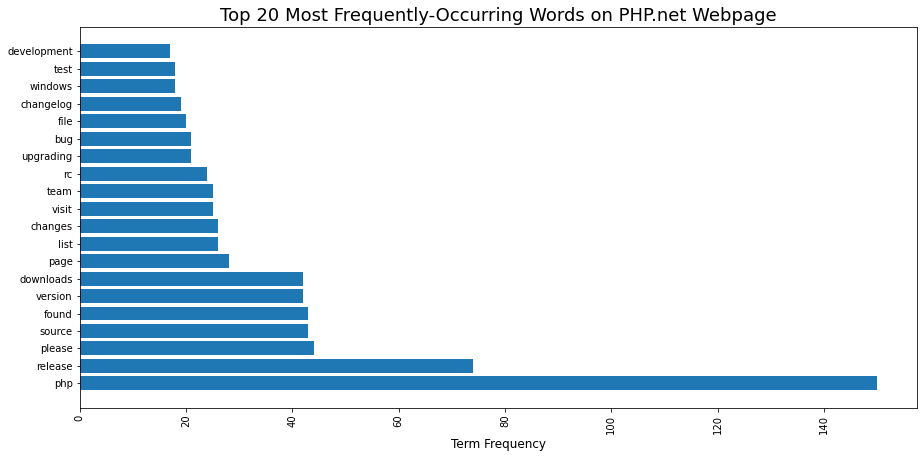

In [22]:
plt.figure(figsize=(15,7))
plt.barh(lst_words, lst_freq)
plt.xticks(rotation = 90)
plt.title('Top 20 Most Frequently-Occurring Words on PHP.net Webpage', fontsize = 18)
plt.xticks(fontsize = 10)
plt.xlabel('Term Frequency', fontsize = 12)
plt.show()